# Model Selection in Machine Learning: Predicting Housing Prices
We'll explore how different models perform on a simple task: predicting housing prices using the California Housing dataset. </br>
This dataset is built into Scikit-Learn, making it easily accessible for our exercises. Let's get started!

<h2>Model Selection</h2>
<p>We will explore three different models to predict housing prices: Linear Regression, Decision Tree Regressor, and Random Forest Regressor.</p>

<h4>Why is Model Selection Important?</h4>
<p>Choosing the right model is crucial because different models have different strengths and weaknesses. The performance of a model can vary depending on the nature of the data and the specific problem we're trying to solve. By evaluating multiple models, we can select the one that provides the best predictions for our particular dataset.</p>

<h4>Why Do Some Models Work Better Than Others?</h4>
<p>Some models work better than others due to various factors such as:</p>
<ul>
  <li><strong>Data Complexity</strong>: Complex models like Random Forest Regressor can capture intricate patterns in the data, while simpler models like Linear Regression might miss these patterns.</li>
  <li><strong>Overfitting and Underfitting</strong>: A model that is too simple might underfit the data, missing important trends, while a model that is too complex might overfit, capturing noise instead of actual patterns.</li>
  <li><strong>Computational Efficiency</strong>: Some models require more computational resources. For large datasets, a simpler, faster model might be more practical.</li>
</ul>

<h4>How Do We Evaluate the Model?</h4>
<p>We will be using <strong>MAE</strong>.</p>
<p><strong>MAE</strong> stands for Mean Absolute Error. It's a way to measure how close your machine learning model's predictions are to the actual outcomes. Here's a simple way to understand it:</p>
<p>Imagine you're trying to guess the ages of several people. After making your guesses, you find out their real ages and calculate how far off you were for each person. Some guesses might be too high, and some might be too low, but you're only interested in how wrong you were, regardless of the direction. So, you take the absolute value of each mistake (which turns any negative numbers into positives) and then average these to get a single number that tells you how well you did overall.</p>
<p>The lower the MAE, the closer your guesses were to the real ages, which means your predictions were pretty accurate!</p>

<h4>Mathematical Function for MAE</h4>
<details>
  <summary>Click to view the mathematical function for MAE</summary>
  <p>The mathematical function for MAE is given by:</p>
  <p style="text-align: center;"><code>MAE = (1/n) &sum; |y<sub>i</sub> - &ycirc;<sub>i</sub>|</code></p>
  <p>Where:</p>
  <ul>
    <li><code>n</code> is the number of data points</li>
    <li><code>y<sub>i</sub></code> is the actual value</li>
    <li><code>&ycirc;<sub>i</sub></code> is the predicted value</li>
  </ul>
</details>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

## Load and Explore the Dataset
The California Housing dataset contains metrics such as the median income, housing median age, average rooms, average bedrooms, population, average occupancy, latitude, and longitude for various blocks in California.

In [3]:
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## Visualizing the DataA quick visualization to understand our data better.



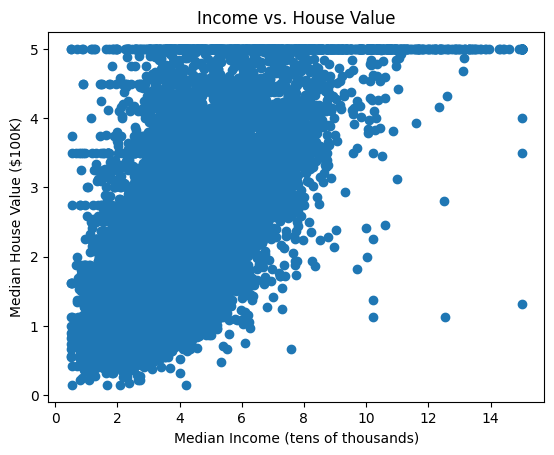

In [4]:
plt.scatter(X['MedInc'], y)
plt.xlabel('Median Income (tens of thousands)')
plt.ylabel('Median House Value ($100K)')
plt.title('Income vs. House Value')
plt.show()

<h2>Splitting the Dataset</h2>
<p>To make sure our models work well, we need to split our data into two parts:</p>
<ol>
  <li><strong>Training Set</strong>: This part is used to train the model, helping it learn patterns in the data.</li>
  <li><strong>Test Set</strong>: This part is used to test the model after training to see how well it performs on new, unseen data.</li>
</ol>
<p>By doing this, we can evaluate how effectively our models will perform in real-world scenarios.</p>



In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3>1. Linear Regression</h3>
<p>A good baseline model due to its simplicity.</p>

<details>
  <summary>Click to learn more about Linear Regression</summary>
  <p><strong>What is Linear Regression?</strong></p>
  <p>Linear Regression is a simple and commonly used model for predicting a continuous outcome variable (y) based on one or more input features (x). The goal is to find the best-fitting straight line through the data points.</p>
  
  <p><strong>How Does It Work?</strong></p>
  <p>The model works by fitting a line (y = mx + b) to the data, where:</p>
  <ul>
    <li><code>y</code> is the predicted value</li>
    <li><code>x</code> is the input feature</li>
    <li><code>m</code> is the slope of the line (indicating how much y changes for a one-unit change in x)</li>
    <li><code>b</code> is the y-intercept (the value of y when x is zero)</li>
  </ul>
  <p>The best-fitting line is found by minimizing the sum of the squared differences between the actual and predicted values (this is called the "least squares" method).</p>
  
  <p><strong>Example</strong></p>
  <p>Imagine you want to predict the price of a house based on its size. If you plot house prices (y) against their sizes (x), Linear Regression will find the line that best fits these data points. The equation might look something like:</p>
  <p style="text-align: center;"><code>Price = 200 * Size + 50,000</code></p>
  <p>In this example:</p>
  <ul>
    <li>The slope (<code>m</code>) is <code>200</code>, meaning that for every additional square meter, the USDy 200 units of currency.</li>
    <li>The y-intercept (<code>b</code>) is <code>50,000</code>, meaning that even if the house size is zero, tUSD50,000 units of currency.</li>
  </ul>
</details>


In [ ]:
# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Evaluate the model
linear_predictions = linear_model.predict(X_test)
linear_mae = mean_absolute_error(y_test, linear_predictions)
print("Linear Regression MAE:", linear_mae)

<h3>2. Decision Tree Regressor</h3>
<p>Useful for capturing non-linear relationships.</p>

<details>
  <summary>Click to learn more about Decision Tree Regressor</summary>
  <p><strong>What is a Decision Tree Regressor?</strong></p>
  <p>A Decision Tree Regressor is a machine learning model used for predicting continuous outcomes. It splits the data into subsets based on feature values, creating a tree-like structure where each leaf node represents a predicted value.</p>
  
  <p><strong>How Does It Work?</strong></p>
  <p>The model works by recursively splitting the data at each node based on the feature that results in the largest decrease in variance (or another criterion). This process continues until the tree reaches a specified depth or other stopping criteria.</p>
  <p>Key components include:</p>
  <ul>
    <li><strong>Root Node</strong>: The starting point of the tree, representing the entire dataset.</li>
    <li><strong>Decision Nodes</strong>: Points where the data is split based on a feature value.</li>
    <li><strong>Leaf Nodes</strong>: The end points of the tree that provide the predicted values.</li>
  </ul>

  <p><strong>Example</strong></p>
  <p>Imagine you want to predict the price of a house based on various features like size, number of rooms, and location. The Decision Tree Regressor will create splits based on these features, resulting in a tree where each leaf node provides a predicted price.</p>
  <p>For instance:</p>
  <ul>
    <li>If the house size is greater than 100 square meters and has more than 3 rooms, it might fall into one leaf node with a predicted price of 300,000 units of currency.</li>
    <li>If the house size is less than 100 square meters but is located in a prime area, it might fall into another leaf node with a predicted price of 250,000 units of currency.</i>
  </ul>
</details>
.

In [ ]:
# Train the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Evaluate the model
tree_predictions = tree_model.predict(X_test)
tree_mae = mean_absolute_error(y_test, tree_predictions)
print("Decision Tree Regressor MAE:", tree_mae)

<h3>3. Random Forest Regressor</h3>
<p>An ensemble method that generally provides high accuracy.</p>

<details>
  <summary>Click to learn more about Random Forest Regressor</summary>
  <p><strong>What is a Random Forest Regressor?</strong></p>
  <p>A Random Forest Regressor is an ensemble learning method that uses multiple decision trees to improve the accuracy and robustness of predictions. Each tree in the forest is trained on a random subset of the data, and the final prediction is the average of all the trees' predictions.</p>
  
  <p><strong>How Does It Work?</strong></p>
  <p>The model works by constructing a multitude of decision trees during training and outputting the average prediction of the individual trees. Key steps include:</p>
  <ul>
    <li><strong>Bootstrap Sampling</strong>: Random subsets of the original data are created with replacement.</li>
    <li><strong>Tree Construction</strong>: Each subset is used to build a decision tree.</li>
    <li><strong>Aggregation</strong>: The predictions of all the trees are averaged to produce the final output.</li>
  </ul>

  <p><strong>Example</strong></p>
  <p>Imagine you want to predict the price of a house based on various features like size, number of rooms, and location. The Random Forest Regressor will create multiple decision trees, each trained on different random subsets of the data. Each tree will make a prediction, and the final predicted price will be the average of all these predictions.</p>
  <p>For instance:</p>
  <ul>
    <li>Tree 1 might predict a price of 280,000 units of currency.</li>
    <li>Tree 2 might predict a price of 290,000 units of currency.</li>
    <li>Tree 3 might predict a price of 310,000 units of currency.</li>
  </ul>
  <p>The Random Forest Regressor will average these predictions to give a final predicted price of (280,000 + 290,000 + 310,000) / 3 = 293,333 units of currency.</p>
</details>


In [ ]:
# Train the Random Forest model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Evaluate the model
forest_predictions = forest_model.predict(X_test)
forest_mae = mean_absolute_error(y_test, forest_predictions)
print("Random Forest Regressor MAE:", forest_mae)


## ComparisonAfter training and evaluating our models, let's compare their performance.



In [ ]:
# Comparing the MAE of all models
mae_values = [linear_mae, tree_mae, forest_mae]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']

plt.bar(model_names, mae_values)
plt.ylabel('Mean Absolute Error')
plt.title('Model Comparison')
plt.show()

## Improve
We saw some base models and compared them, but we can improve the performance of our model by modifying parameters.

### Decision Tree Regressor Parameters
Let's adjust the max_depth parameter of the Decision Tree Regressor and see how it influences the model

max_depth: Controls the maximum depth of the tree. A deeper tree can capture more complex patterns but also risks overfitting. Setting it too low might not capture enough complexity, leading to underfitting..

In [ ]:
# Varying the max_depth of the Decision Tree
max_depth_values = [2, 4, 6, 8, None]  # None means the tree can grow as much as it needs
dt_mae_scores = []

for depth in max_depth_values:
    dt_model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt_model.fit(X_train, y_train)
    dt_predictions = dt_model.predict(X_test)
    dt_mae = mean_absolute_error(y_test, dt_predictions)
    dt_mae_scores.append(dt_mae)

# Plotting the MAE scores for different max_depth values
plt.figure(figsize=(10, 5))
plt.plot(['2', '4', '6', '8', 'None'], dt_mae_scores, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Mean Absolute Error')
plt.title('Decision Tree Performance vs. Max Depth')
plt.show()

### Random Forest Regressor Parameters
For the Random Forest Regressor, let's tweak the n_estimators parameter, which controls the number of trees in the forest

n_estimators: Determines the number of trees in the forest. More trees can lead to better performance but also require more computational resources. It's a balance between performance and efficiency..

In [ ]:
# Adjusting the n_estimators of the Random Forest
n_estimators_values = [10, 50, 100, 200]
rf_mae_scores = []

for n_estimators in n_estimators_values:
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)
    rf_mae = mean_absolute_error(y_test, rf_predictions)
    rf_mae_scores.append(rf_mae)

# Plotting the MAE scores for different n_estimators values
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_values, rf_mae_scores, marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Mean Absolute Error')
plt.title('Random Forest Performance vs. Number of Trees')
plt.show()

### Playing with Parameters
Adjusting these parameters allows us to control the model's complexity and its ability to generalize from training data to unseen data. Here's how you can play with them:

For the Decision Tree, start with a low max_depth and gradually increase it to see how the model's performance changes. Notice when the performance starts to degrade, indicating overfitting.</br>
For the Random Forest, increasing n_estimators generally improves model performance up to a point. Identify the sweet spot where adding more trees has diminishing returns on performance improvement. </br>